# Handling missing value (Categorical data)

## 1.Most Frequent method

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('train.csv', usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [100]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [101]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [102]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

### Missing value visualization of GarageQaul column

Text(0, 0.5, 'Number of houses')

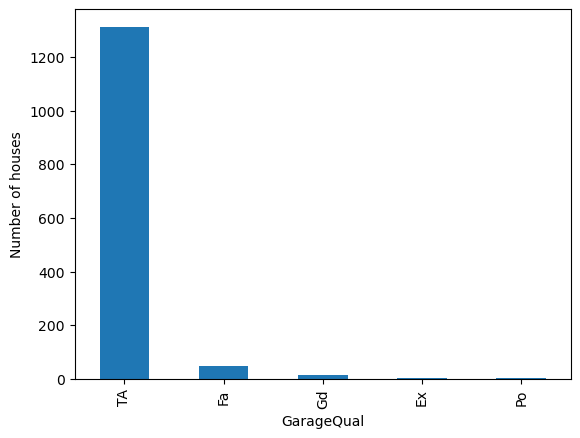

In [103]:
df['GarageQual'].value_counts().plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

Text(0.5, 1.0, 'GarageQual')

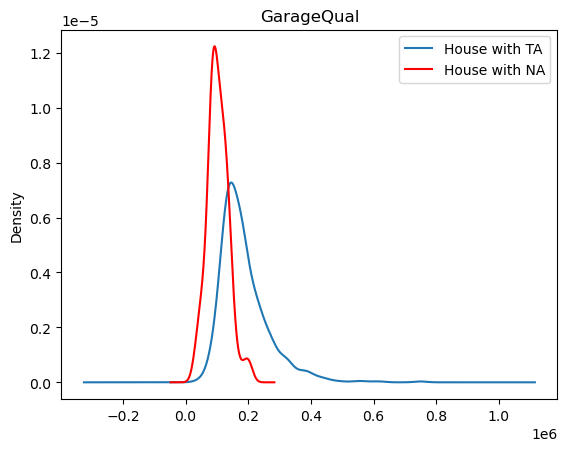

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels =['House with TA', 'House with NA']
ax.legend(lines,labels, loc='best')
plt.title('GarageQual')

In [105]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [106]:
df.fillna({'GarageQual':'TA'},inplace = True)

In [107]:
df['GarageQual'].isnull().sum()

0

<Axes: xlabel='GarageQual'>

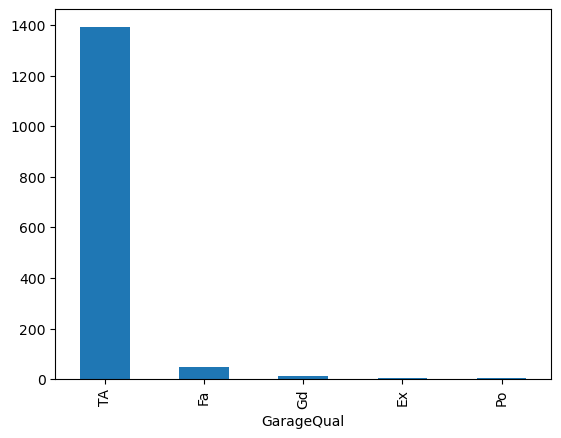

In [108]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

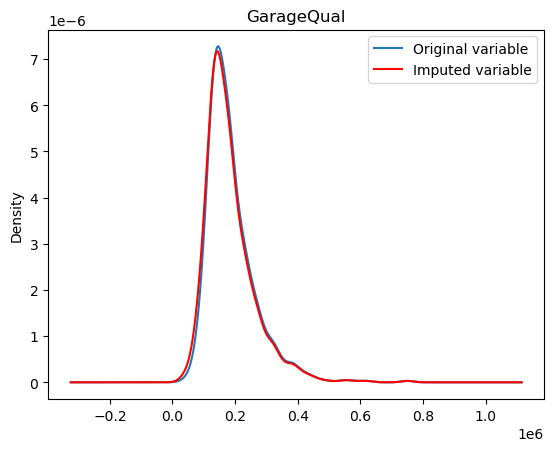

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

### Missing value visualization of FireplaceQu column

<Axes: xlabel='FireplaceQu'>

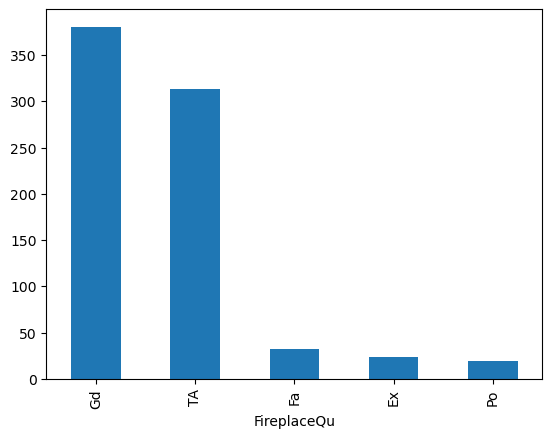

In [110]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [111]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

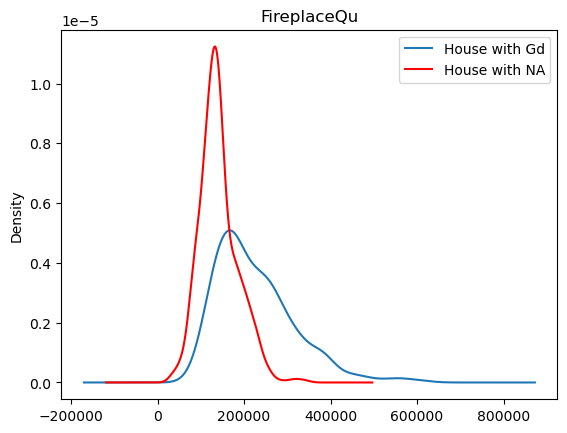

In [112]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['House with Gd', 'House with NA']
ax.legend(lines, labels,loc='best')
plt.title('FireplaceQu')

In [113]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df.fillna({'FireplaceQu':'Gd'},inplace = True)

<Axes: ylabel='Density'>

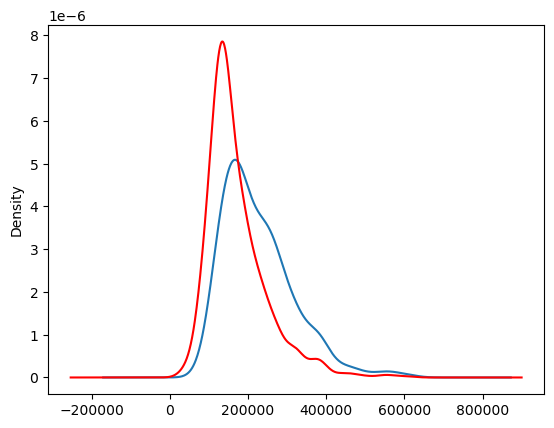

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde', ax=ax)
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax, color='red')

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X= df.drop('SalePrice',axis =1)
y = df['SalePrice']

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [118]:
from sklearn.impute import SimpleImputer

In [119]:
imputer = SimpleImputer(strategy  ='most_frequent')

In [120]:
X_train= imputer.fit_transform(X_train)
X_test= imputer.transform(X_test)

In [121]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

## 2.Missing category imputation

In [122]:
X= df.drop('SalePrice',axis =1)
y = df['SalePrice']

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [124]:
imputer1 = SimpleImputer(strategy  ='constant', fill_value= 'Missing')

In [125]:
X_train= imputer1.fit_transform(X_train)
X_test= imputer1.transform(X_test)

In [126]:
imputer1.statistics_

array(['Missing', 'Missing'], dtype=object)